In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import re
import json
import ast

# 1.DATA PROCESSING

## a. Import and concatenate

### i) Import all city’s dataset  - Unstructured format

In [2]:
df1 = pd.read_excel("bangalore_cars.xlsx")
df1

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [3]:
df2 = pd.read_excel("chennai_cars.xlsx")
# df2

In [4]:
df3 = pd.read_excel("delhi_cars.xlsx")
# df3

In [5]:
df4 = pd.read_excel("hyderabad_cars.xlsx")
# df4

In [6]:
df5 = pd.read_excel("jaipur_cars.xlsx")
# df5

In [7]:
df6 = pd.read_excel("kolkata_cars.xlsx")
# df6

### ii) Convert it into a  structured format.

In [8]:
def structure_data(df):
    d1_list = []
    d2_list = []
    d3_list = []
    d4_list = []
    d5_list = []
    for row in range(len(df)):
        a = df.iloc[row]["new_car_detail"]
        res = ast.literal_eval(a)
        d1_df = pd.DataFrame([res])
        d1_list.append(d1_df)
        
        b = df.iloc[row]["new_car_overview"]
        res = ast.literal_eval(b)
        d2_df = pd.DataFrame([res])
        key_lst=[]
        val_lst=[]
        for i in d2_df["top"]:
            for j in i:
                key_lst.append(j["key"])
                val_lst.append(j["value"])
        result = dict(zip(key_lst, val_lst))
        d2_df = pd.DataFrame([result])
        d2_list.append(d2_df)
        
        c = df.iloc[row]["new_car_feature"]
        res = ast.literal_eval(c)
        d3_df = pd.DataFrame()
        for i in res.keys():
            if i == 'heading':
                d3_df[res[i]] = [len(res["top"])]
            elif i == 'data':
                for a in res[i]:
                    for b in a:
                        if b == 'heading':
                            d3_df[a[b]] = [len(a["list"])]
        d3_list.append(d3_df)
        
        d = df.iloc[row]["new_car_specs"]
        res = ast.literal_eval(d)
        d4_df = pd.DataFrame()
        for i in res.keys():
            if i == 'top':
                for j in res[i]:
                    d4_df[j["key"]] = [j["value"]]
            elif i == 'data':
                for a in res[i]:
                    for b in a:
                        if b == 'heading':
                            d4_df[a[b]] = [len(a["list"])]
                        elif b == 'list':
                            for j in a[b]:
                                d4_df[j["key"]] = [j["value"]]
        d4_df = d4_df.rename(columns={'Seats':'Seats_capacity'})
        d4_list.append(d4_df)
        
        e = df.iloc[row]["car_links"]
        d5_df = pd.DataFrame([e])
        d5_list.append(d5_df) 
        
    d1 = pd.concat(d1_list, ignore_index=True)
    d2 = pd.concat(d2_list, ignore_index=True)
    d3 = pd.concat(d3_list, ignore_index=True)
    d4 = pd.concat(d4_list, ignore_index=True)
    d5 = pd.concat(d5_list, ignore_index=True)
    
    df = d1.join(d2).join(d3).join(d4).join(d5)
    df.rename(columns={0:"car_links"},inplace = True)
    
    return df

In [9]:
df1 = structure_data(df1)
df1

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0,Diesel,SUV,"1,56,039",Manual,2,2nd Owner,Toyota,Toyota Fortuner,2012,...,Drum,176 Kmph,9.6 Seconds,"Tubeless,Radial",5,296-litres,17,17,NaN,https://www.cardekho.com/used-car-details/used...
1477,0,Petrol,Sedan,"56,000",Manual,2,2nd Owner,Maruti,Maruti SX4,2008,...,Drum,177 kmph,12.1 seconds,"Tubeless, Radial",4,505 litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...
1478,0,Petrol,Hatchback,"42,000",Manual,2,2nd Owner,Honda,Honda Brio,2014,...,Drum,164 Kmph,14.5 Seconds,"Tubeless,Radial",5,175-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1479,0,Diesel,Hatchback,"93,003",Manual,1,1st Owner,Hyundai,Hyundai i20,2018,...,Drum,180 Kmph,11.9 Seconds,Tubeless,5,295-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...


In [10]:
df2 = structure_data(df2)
df2

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen,car_links
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,No,1280mm,1290mm,1540kg,4.5 metres,145 Kmph,15.7 Seconds,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,No,NaN,NaN,NaN,5.0,NaN,11.7,72.2 x 81.3,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,No,1400mm,1385mm,NaN,4.7 metres,165 Kmph,14.3 Seconds,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,No,NaN,NaN,NaN,5.1 meters,172 Kmph,13.7 Seconds,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,0,Petrol,Hatchback,"42,891",Automatic,1,1st Owner,Maruti,Maruti Swift,2018,...,No,1530mm,1530mm,1315kg,4.8 Meters,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1415,0,Diesel,SUV,"59,100",Manual,1,1st Owner,Renault,Renault Duster,2018,...,No,1560mm,1567mm,1777kg,5.2 metres,156 Kmph,13.9 Seconds,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1416,0,Petrol,SUV,"55,913",Automatic,1,1st Owner,Tata,Tata Nexon,2018,...,No,1540 mm,1530 mm,NaN,5.1m,154.19 kmph,NaN,77x85.8,209 mm,https://www.cardekho.com/used-car-details/used...
1417,0,Diesel,SUV,"65,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Tiguan,2017,...,No,1578mm,1568mm,2250kg,5.75meters,NaN,NaN,74.5 x 81 mm,NaN,https://www.cardekho.com/used-car-details/used...


In [11]:
df3 = structure_data(df3)
df3

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Turning Radius,Top Speed,Acceleration,Gross Weight,Front Tread,Rear Tread,BoreX Stroke,Compression Ratio,Ground Clearance Unladen,car_links
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,...,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,...,NaN,217 Kmph,NaN,2360kg,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,...,4.8,NaN,NaN,1335,1530,1530,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,...,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,Petrol,Sedan,"60,000",Automatic,1,1st Owner,Honda,Honda City,2019,...,5.3 metres,195 Kmph,10 Seconds,1455kg,1490mm,1480mm,73.0 X 89.4 mm,10.3:1,NaN,https://www.cardekho.com/used-car-details/used...
1481,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Kia,Kia Sonet,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1482,0,Petrol,Sedan,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Verna,2011,...,5.2 metres,196km/hr,10.5 Seconds,NaN,NaN,NaN,77.0mm X 85.44mm,10.5;1,NaN,https://www.cardekho.com/used-car-details/used...
1483,0,Diesel,SUV,"38,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2019,...,5.3 metres,160.58kmph,10.83 s,NaN,NaN,NaN,NaN,NaN,190mm,https://www.cardekho.com/used-car-details/used...


In [12]:
df4 = structure_data(df4)
df4

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Top Speed,Acceleration,Ground Clearance Unladen,car_links
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,...,Disc,Drum,"Tubeless,Radial",R16,5,280,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,...,Disc,Drum,Tubeless,NaN,5,215-litres,135 Kmph,19 Seconds,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,...,Disc,Drum,"Tubeless, Radial",NaN,5,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,...,Disc,Drum,"Tubeless,Radial",16,5,339-litres,180 Kmph,12.36 seconds,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,...,Disc,Drum,"Radial, Tubeless",18,3,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,2013,...,Disc & Caliper Type,Disc & Caliper Type,"Tubeless,Radial",17,5,NaN,175 kmph,12.5 Seconds,NaN,https://www.cardekho.com/used-car-details/used...
1479,0,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,2014,...,Disc,Disc,"Tubeless,Radial",20,4,540-litres,250 Kmph,6.4 Seconds,NaN,https://www.cardekho.com/used-car-details/used...
1480,0,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,2018,...,Ventilated Disc,Ventilated Disc,"Tubeless, Runflat",R18,4,520-litres,235kmph,7.5,NaN,https://www.cardekho.com/used-car-details/used...
1481,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,2019,...,Disc,Drum,Tubeless Radial Tyres,NaN,5,350,154.19 kmph,13.25 Seconds,209 mm,https://www.cardekho.com/used-car-details/used...


In [13]:
df5 = structure_data(df5)
df5

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Acceleration,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Gross Weight,BoreX Stroke,Compression Ratio,Ground Clearance Unladen,car_links
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,11.9 Seconds,Tubeless,16,5,295-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,NaN,"Radial, Tubeless",NaN,5,268,1335,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,15.05 Seconds,"Tubeless, Radial",NaN,5,235-litres,1250kg,73 X 82 mm,11.0:1,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,12.9 Seconds,Tubeless,NaN,5,256,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,18.6 Seconds,Tubeless Tyres,NaN,5,180-liters,1350kg,69 x 72 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Chevrolet,Chevrolet Beat,2011,...,NaN,"Tubeless,Radial",14,5,170-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1116,0,Petrol,Hatchback,"70,000",Manual,1,1st Owner,Maruti,Maruti Alto,2007,...,17.7 seconds,"Tubeless,Radial",12,5,NaN,1140kg,68.5 x 72.0 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1117,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Renault,Renault Kiger,2022,...,NaN,"Tubeless, Radial",16,5,405,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1118,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Alto,2009,...,17.7 seconds,"Tubeless,Radial",12,5,NaN,1140kg,68.5 x 72.0 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...


In [14]:
df6 = structure_data(df6)
df6

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Ground Clearance Unladen,Cargo Volumn,Compression Ratio,Acceleration,Top Speed,car_links
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,...,Solid Disc,"Tubeless,Radial",17,4,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,...,Drum,NaN,NaN,5,185mm,222,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,...,Drum,"Tubeless, Radial",NaN,5,NaN,405,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,...,Drum,"Tubeless,Radial",14,5,NaN,295 Lit,:1,12.96 Sec,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,...,Drum,"Tubeless,Radial",16,5,NaN,460-litres,NaN,8.2 Seconds,212 Kmph,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,Drum,"Tubeless, Radial",NaN,5,NaN,313,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1377,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,Drum,Tubeless Tyres,NaN,5,NaN,177-litres,NaN,19 Seconds,140 kmph,https://www.cardekho.com/used-car-details/used...
1378,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,Solid Disc,"Tubeless,Radial",17,4,NaN,475-litres,9.3:1,8.8 Seconds,230km/hr,https://www.cardekho.com/used-car-details/used...
1379,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,Drum,"Tubeless,Radial",14,5,NaN,236-liters,NaN,15 Seconds,156 Kmph,https://www.cardekho.com/used-car-details/used...


### iii) Add a new column named ‘City’

In [15]:
df1["City"] = 'Bangalore'

In [16]:
df2["City"] = 'Chennai'

In [17]:
df3["City"] = 'Delhi'

In [18]:
df4["City"] = 'Hyderabad'

In [19]:
df5["City"] = 'Jaipur'

In [20]:
df6["City"] = 'Kolkata'

### iv) Concatenate all datasets

In [21]:
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [22]:
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,NaN,NaN,"Tubeless, Radial",5,313,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres,17,17,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters,14,14,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata


In [23]:
# df.to_excel('Structured_df.xlsx')

## b) Handling Missing Values

### Identify and fill or remove missing values in the dataset.
### i) For numerical columns, use techniques like mean, median, or mode imputation.
### ii) For categorical columns, use mode imputation or create a new category for missing values.

In [24]:
# pd.DataFrame(df.isnull().sum()).T.iloc[0,0:40]
pd.DataFrame(df.isnull().sum())

,0
it,0
ft,0
bt,0
km,0
transmission,0
...,...
Wheel Size,2983
Alloy Wheel Size,2983
Ground Clearance Unladen,7854
car_links,0


In [25]:
# Iterate through columns and their data types
for col, dtype in df.dtypes.items():
    non_null_count = df[col].notnull().sum()  # Non-null count per column

    # If the column is categorical (object) and has missing values
    if non_null_count < len(df) and dtype == 'object' and col != 'priceActual':
        # Ensure mode() is not empty before filling
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value[0])

    # If the column is numeric and has missing values
    elif non_null_count < len(df):
        try:
            # Fill missing values with the median if it's numeric
            df[col] = df[col].fillna(df[col].median())
        except TypeError:
            print(f"Cannot calculate median for column: {col}, invalid data type.")

In [26]:
df["bt"] = df["bt"].replace("",df["bt"].mode()[0])
df["priceFixedText"] = df["priceFixedText"].fillna(0)
df["Wheel Size"] = df["Wheel Size"].fillna(0)
df["Alloy Wheel Size"] = df["Alloy Wheel Size"].fillna(0)

C:\Users\nagar\AppData\Local\Temp\ipykernel_32112\1143414845.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["priceFixedText"] = df["priceFixedText"].fillna(0)


In [27]:
df["priceActual"] = df["priceActual"].replace("",0)
price_mean = df["priceActual"].str.replace('₹ |Lakh',"",regex=True).astype(float).mean().round(2)
df["priceActual"].replace(0,price_mean,inplace=True)

In [28]:
df["priceSaving"] = df["priceSaving"].replace("",0)

C:\Users\nagar\AppData\Local\Temp\ipykernel_32112\1668236997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["priceSaving"] = df["priceSaving"].replace("",0)


In [29]:
# df.info()

In [30]:
# df.to_excel("Not_null.xlsx")

## c) Standardising Data Formats

In [31]:
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,165 Kmph,10 Seconds,"Tubeless,Radial",4,352-litres,16,16,190mm,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,190mm,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,165 Kmph,10 Seconds,"Tubeless, Radial",5,313,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres,17,17,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters,14,14,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata


## Cleaning Features (except target)

### i) Conveting the columns datatype to numeric

In [32]:
lst = ["ownerNo","modelYear","Year of Manufacture","Features","Comfort & Convenience","Interior","Exterior","Safety",
       "Entertainment & Communication","Engine and Transmission","Displacement","No of Cylinder",
       "Values per Cylinder","Dimensions & Capacity","Miscellaneous","Seating Capacity","No Door Numbers"]
for i in lst:
    df[i] = pd.to_numeric(df[i], errors='coerce')

### ii) Replacing all the null values and replacing unnecessary values to numeric

In [33]:
df["Torque"] = df["Torque"].astype(str)
df["Torque"] = df["Torque"].str.replace(r'Nm|nm|NM|kgm| KGM| Nm| kgs|at.*|/.*|\(.*\)', '', regex=True).str.strip()
df["Torque"] = df["Torque"].astype(float)

In [34]:
df["Turning Radius"] = df["Turning Radius"].str.replace(r"metres|Seconds|mtrs.|meters|eters|eter|etre|trs|mm|M|Metre|m|\.|,", "", regex=True).str.strip()
df["Turning Radius"] = df["Turning Radius"].astype(int)

In [35]:
df["Kerb Weight"] = df["Kerb Weight"].str.replace(r"Kerb Weight","0", regex=True)
df["Kerb Weight"] = df["Kerb Weight"].str.replace(r"kg|Kg|kgs|Kgs|s|-*|,|\s*|\.","",regex=True).astype(int)

In [36]:
df["bhp"] = df["Max Power"].str.split('@', expand=True).drop(columns=[2], axis=1)[0]
df["rpm"] = df["Max Power"].str.split('@', expand=True).drop(columns=[2], axis=1)[1]

df["bhp"] = df["bhp"].str.replace(r"bhp|PS|at*|\s*|rpm|hp|\.|RPM*|,|kW|-*|HP*|B|Ps|ps|\(.*\)|/|\[.*\]","",regex=True).astype(float)
df["rpm"] = df["rpm"].fillna(0)

def clean_max_power(max_power):
    pattern = r'\d{3,5}'
    match = re.search(pattern, max_power)
    if match and match.group(0):
        return match.group(0)
    else:
        return max_power
df['rpm'] = df['Max Power'].astype(str).apply(clean_max_power)
df["rpm"] = df["rpm"].replace(r'bhp', "",regex=True).astype(float)

In [37]:
df['km'] = df['km'].str.replace(",","")
df["Mileage"] = df["Mileage"].replace(r' km/kg|kmpl', "", regex=True).astype(float)
df["Seats"] = df["Seats"].str.replace('Seats','').str.strip()
df["Kms Driven"] = df["Kms Driven"].str.replace(",","").str.replace('Kms','').str.strip()
df["Engine"] = df["Engine"].str.replace('CC','').str.strip()
df["Length"] = df["Length"].str.replace(r"mm|,","", regex=True).astype(int)
df["Width"] = df["Width"].str.replace("mm|,","", regex=True).astype(int)
df["Height"] = df["Height"].str.replace("mm|,|-*","", regex=True).astype(int)
df["Wheel Base"] = df["Wheel Base"].str.replace("mm|,|m","",regex=True).astype(int)
df["Front Tread"] = df["Front Tread"].str.replace("mm|,","", regex=True).astype(int)
df["Rear Tread"] = df["Rear Tread"].str.replace("mm|,|`","", regex=True).astype(int)
df["Gross Weight"] = df["Gross Weight"].str.replace(r"kg|Kg|s|,|-*|\.|mm","", regex=True).astype(int)
df["Wheel Size"] = df["Wheel Size"].replace(r"R","", regex=True).astype(float)
df["Alloy Wheel Size"] = df["Alloy Wheel Size"].replace(r"R","", regex=True).astype(float)
df["Top Speed"] = df["Top Speed"].str.replace(r"kmph|km/h|/Hour|Km|km/hr|Kmph|ph|r","", regex=True).str.strip().replace("","0.0").astype(float)

In [38]:
lst=[]
for i in df["Registration Year"]:
    lst.append(re.findall(r'\d+', i))

In [39]:
df['Reg_year'] = lst
df['Reg_year'] = df['Reg_year'].apply(lambda x: x[0] if isinstance(x, list) else x)
current_year = 2024
yr_list=[]
for i in df['Reg_year']:
    yr_list.append(current_year-int(i))
df["Reg_age"] = yr_list

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8369 non-null   int64  
 1   ft                             8369 non-null   object 
 2   bt                             8369 non-null   object 
 3   km                             8369 non-null   object 
 4   transmission                   8369 non-null   object 
 5   ownerNo                        8369 non-null   int64  
 6   owner                          8369 non-null   object 
 7   oem                            8369 non-null   object 
 8   model                          8369 non-null   object 
 9   modelYear                      8369 non-null   int64  
 10  centralVariantId               8369 non-null   int64  
 11  variantName                    8369 non-null   object 
 12  price                          8369 non-null   o

## Cleaning Target

In [41]:
def convert_to_lakhs(price):
    price = price.replace('₹', '').replace(',', '').strip()
    if 'Crore' in price:
        return float(price.replace('Crore', '').strip()) * 100
    elif 'Lakh' in price:
        return float(price.replace('Lakh', '').strip())     
    else:
        return float(price)/100

In [42]:
df.loc[:,'price_in_lakhs'] = df['price'].apply(convert_to_lakhs)

In [43]:
df.drop(columns=['Max Power',"price"], inplace=True)

In [44]:
df.to_csv("Clean_data.csv")

## Dropping Unnecessary columns

'''Dropping columns: "priceFixedText" and "priceSaving"- all 8369 missing,"Ground Clearance Unladen" - 7854 values missing
"Owner No" and "owner" columns are same, "trendingText" contains url which is not needed, "Engine Displacement" and "Engine"
columns both are same, "car_links" is not need for analysis, "Value Configuration", "Cargo Volumn","Value Configuration",
"Fuel Suppy System","BoreX Stroke","Compression Ratio", "Acceleration","Seats_capacity", "Engine Type", "Max Torque", 
"Compression Ratio", "Tyre Type" are unnecessary'''

In [45]:
df.drop(columns=["priceFixedText", "Ground Clearance Unladen", "priceSaving", "owner", "trendingText", "variantName",
                 "Engine Displacement", "car_links", "Cargo Volumn", "Value Configuration", "Fuel Suppy System", 
                 "BoreX Stroke", "Compression Ratio", "Acceleration", "Seats_capacity", "Engine Type", "Max Torque", 
                 "Compression Ratio", "Tyre Type", "it", "Registration Year", "ft", "RTO", "priceActual", 
                 "transmission","Kms Driven", "Ownership",'priceSaving','priceFixedText',
                 'Gear Box', "Engine Type", "modelYear", "Year of Manufacture", "centralVariantId",
                "Reg_year", 'Kerb Weight','Front Tread','Rear Tread','Gross Weight',"Seats"], inplace=True)

In [46]:
Features_columns = ["Features","Comfort & Convenience", "Interior", "Exterior", "Safety", "Entertainment & Communication",
                   "Wheel Base", "Miscellaneous", "Steering Type", "Drive Type", "Color","Turbo Charger", "Super Charger",
                   "Front Brake Type", "Rear Brake Type"]

In [47]:
df.drop(columns = Features_columns, inplace=True)

In [48]:
# columns_to_drop = ['Seats_x','ft','owner','Kms Driven','Ownership','it','priceActual','price','Value Configuration',
#                    'priceSaving','priceFixedText','trendingText', 'Registration Year','RTO',
#                    'variantName','Engine','Max Power','Torque','Engine Type','Engine Displacement',
#                      'Kerb Weight','Gear Box','Transmission','Cargo Volumn','Compression Ratio',
#                      'Max Torque','Tyre Type','Registration Month',
#                      'Front Tread','Rear Tread','Gross Weight','Acceleration','BoreX Stroke','Ground Clearance Unladen']

In [49]:
df.to_csv("Necessary.csv")

## d) Encoding Categorical Variables

### i) Label Encoder  - ordinal categorical variables

In [50]:
# df = pd.read_csv("Necessary.csv")

In [51]:
# df = df.drop(columns=["Unnamed: 0"])
# df

In [52]:
le_lst = ["bt", "Insurance Validity", "City", "Fuel Type", "Transmission","oem", "model"]

In [53]:
le_encoder = LabelEncoder()
def le_encode(lst, df):
    for i in lst:
        df[i] = le_encoder.fit_transform(df[i])

In [54]:
le_encode(le_lst, df)

### ii) One Hot Encoder - nominal categorical variables.

In [55]:
# oh_lst = ["Turbo Charger", "Super Charger", "Steering Type"]

In [56]:
# Apply one-hot encoding to the categorical columns
# oh_encoder = OneHotEncoder(sparse_output=False, drop='first')
# def oh_encode(lst, df):
#     for i in lst:
#         df[i] = df[i].fillna("Unknown")
#         encoded = oh_encoder.fit_transform(df[[i]])
#         encoded_df = pd.DataFrame(encoded, columns=oh_encoder.get_feature_names_out([i]), index=df.index)
#         df = pd.concat([df.drop(i, axis=1), encoded_df], axis=1)
#     return df

In [57]:
# df = oh_encode(oh_lst, df)

In [58]:
df

,bt,km,ownerNo,oem,model,Insurance Validity,Fuel Type,Transmission,Mileage,Engine,...,Turning Radius,Top Speed,No Door Numbers,Wheel Size,Alloy Wheel Size,City,bhp,rpm,Reg_age,price_in_lakhs
0,2,120000,3,20,160,5,4,1,23.10,998,...,47,150.0,5,16.0,16.0,0,6704.0,6000.0,9,4.00
1,7,32706,2,6,50,2,4,1,17.00,1497,...,53,165.0,4,16.0,16.0,0,12131.0,121.0,6,8.11
2,2,11949,1,29,273,2,4,1,23.84,1199,...,49,150.0,5,14.0,14.0,0,84.0,6000.0,6,5.85
3,8,17794,1,9,87,2,4,1,19.10,1197,...,47,172.0,4,14.0,14.0,0,8186.0,6000.0,10,4.62
4,7,60000,1,20,178,5,1,1,23.65,1248,...,52,190.0,5,16.0,16.0,0,885.0,4000.0,9,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,10000,1,20,160,5,4,1,25.24,998,...,53,165.0,5,16.0,16.0,5,6571.0,5500.0,2,5.10
8365,2,120000,1,20,155,5,4,1,22.74,796,...,46,140.0,5,16.0,16.0,5,473.0,6000.0,10,1.80
8366,8,50000,3,21,197,5,4,0,11.74,1796,...,542,230.0,4,17.0,17.0,5,186.0,186.0,13,5.50
8367,2,40000,1,20,175,5,4,1,18.50,1197,...,47,156.0,5,14.0,14.0,5,8580.0,6000.0,12,1.40


In [59]:
df.to_csv("encode.csv")

## e) Normalizing Numerical Features

### MinMax Scaler

In [60]:
numerical_features = ["km", "Mileage", "Engine", "Torque", "Displacement", "Length", "Width", "Height", "Top Speed", 
                      "bhp", "rpm","Reg_age"]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

In [61]:
df

,bt,km,ownerNo,oem,model,Insurance Validity,Fuel Type,Transmission,Mileage,Engine,...,Turning Radius,Top Speed,No Door Numbers,Wheel Size,Alloy Wheel Size,City,bhp,rpm,Reg_age,price_in_lakhs
0,2,0.021818,3,20,160,5,4,1,0.120524,0.1996,...,47,0.483871,5,16.0,16.0,0,1.841881e-09,0.909091,0.380952,4.00
1,7,0.005947,2,6,50,2,4,1,0.074631,0.2994,...,53,0.532258,4,16.0,16.0,0,3.340740e-09,0.018333,0.238095,8.11
2,2,0.002173,1,29,273,2,4,1,0.126091,0.2398,...,49,0.483871,5,14.0,14.0,0,1.353309e-11,0.909091,0.238095,5.85
3,8,0.003235,1,9,87,2,4,1,0.090430,0.2394,...,47,0.554839,4,14.0,14.0,0,2.251188e-09,0.909091,0.428571,4.62
4,7,0.010909,1,20,178,5,1,1,0.124661,0.2496,...,52,0.612903,5,16.0,16.0,0,2.347577e-10,0.606061,0.380952,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,0.001818,1,20,160,5,4,1,0.136624,0.1996,...,53,0.532258,5,16.0,16.0,5,1.805148e-09,0.833333,0.047619,5.10
8365,2,0.021818,1,20,155,5,4,1,0.117815,0.1592,...,46,0.451613,5,16.0,16.0,5,1.209692e-10,0.909091,0.428571,1.80
8366,8,0.009091,3,21,197,5,4,0,0.035059,0.3592,...,542,0.741935,4,17.0,17.0,5,4.170401e-11,0.028182,0.571429,5.50
8367,2,0.007273,1,20,175,5,4,1,0.085916,0.2394,...,47,0.503226,5,14.0,14.0,5,2.360005e-09,0.909091,0.523810,1.40


## f) Removing Outliers

### i) IQR Range

In [62]:
# df.corr()

In [63]:
col = ["km", "Insurance Validity", "Mileage", "Engine", "Torque", "Turning Radius", "bt", "Fuel Type","price_in_lakhs"]

In [64]:
def out_det():
    print(ll)
    print(ul)
    print(iqr)

In [65]:
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [66]:
out_det()

km                    -0.008182
Insurance Validity    -2.500000
Mileage                0.025166
Engine                 0.149100
Torque                -0.061879
Turning Radius        40.500000
bt                    -7.000000
Fuel Type             -3.500000
price_in_lakhs        -4.645000
dtype: float64
km                     0.028182
Insurance Validity     9.500000
Mileage                0.157275
Engine                 0.389900
Torque                 0.435045
Turning Radius        60.500000
bt                    17.000000
Fuel Type              8.500000
price_in_lakhs        18.515000
dtype: float64
km                    0.009091
Insurance Validity    3.000000
Mileage               0.033027
Engine                0.060200
Torque                0.124231
Turning Radius        5.000000
bt                    6.000000
Fuel Type             3.000000
price_in_lakhs        5.790000
dtype: float64


In [67]:
filtered_df = df[(df["price_in_lakhs"] >= -4.645000) & (df["price_in_lakhs"] <= 18.515000)]

In [68]:
filtered_df

,bt,km,ownerNo,oem,model,Insurance Validity,Fuel Type,Transmission,Mileage,Engine,...,Turning Radius,Top Speed,No Door Numbers,Wheel Size,Alloy Wheel Size,City,bhp,rpm,Reg_age,price_in_lakhs
0,2,0.021818,3,20,160,5,4,1,0.120524,0.1996,...,47,0.483871,5,16.0,16.0,0,1.841881e-09,0.909091,0.380952,4.00
1,7,0.005947,2,6,50,2,4,1,0.074631,0.2994,...,53,0.532258,4,16.0,16.0,0,3.340740e-09,0.018333,0.238095,8.11
2,2,0.002173,1,29,273,2,4,1,0.126091,0.2398,...,49,0.483871,5,14.0,14.0,0,1.353309e-11,0.909091,0.238095,5.85
3,8,0.003235,1,9,87,2,4,1,0.090430,0.2394,...,47,0.554839,4,14.0,14.0,0,2.251188e-09,0.909091,0.428571,4.62
4,7,0.010909,1,20,178,5,1,1,0.124661,0.2496,...,52,0.612903,5,16.0,16.0,0,2.347577e-10,0.606061,0.380952,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,0.001818,1,20,160,5,4,1,0.136624,0.1996,...,53,0.532258,5,16.0,16.0,5,1.805148e-09,0.833333,0.047619,5.10
8365,2,0.021818,1,20,155,5,4,1,0.117815,0.1592,...,46,0.451613,5,16.0,16.0,5,1.209692e-10,0.909091,0.428571,1.80
8366,8,0.009091,3,21,197,5,4,0,0.035059,0.3592,...,542,0.741935,4,17.0,17.0,5,4.170401e-11,0.028182,0.571429,5.50
8367,2,0.007273,1,20,175,5,4,1,0.085916,0.2394,...,47,0.503226,5,14.0,14.0,5,2.360005e-09,0.909091,0.523810,1.40


# 2.Exploratory Data Analysis (EDA)

## a) Descriptive Statistics

In [69]:
df[col].corr()

,km,Insurance Validity,Mileage,Engine,Torque,Turning Radius,bt,Fuel Type,price_in_lakhs
km,1.000000,0.042837,-0.010948,0.091089,0.044030,0.039514,0.031965,-0.165490,0.024089
Insurance Validity,0.042837,1.000000,0.017758,-0.061008,-0.084898,0.017183,-0.003327,-0.035062,0.033227
Mileage,-0.010948,0.017758,1.000000,-0.536589,-0.342102,-0.111759,-0.319919,-0.099960,-0.090099
Engine,0.091089,-0.061008,-0.536589,1.000000,0.782394,0.200480,0.480295,-0.470729,0.024434
Torque,0.044030,-0.084898,-0.342102,0.782394,1.000000,0.204053,0.479106,-0.601987,0.019505
Turning Radius,0.039514,0.017183,-0.111759,0.200480,0.204053,1.000000,0.048295,-0.115381,0.014652
bt,0.031965,-0.003327,-0.319919,0.480295,0.479106,0.048295,1.000000,-0.301065,-0.018720
Fuel Type,-0.165490,-0.035062,-0.099960,-0.470729,-0.601987,-0.115381,-0.301065,1.000000,0.019113
price_in_lakhs,0.024089,0.033227,-0.090099,0.024434,0.019505,0.014652,-0.018720,0.019113,1.000000


In [70]:
df[col].describe()

,km,Insurance Validity,Mileage,Engine,Torque,Turning Radius,bt,Fuel Type,price_in_lakhs
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.010723,3.776198,0.091511,0.284925,0.204164,88.449038,4.981479,2.986378,18.359159
std,0.013466,1.455680,0.029803,0.095508,0.129675,149.183886,2.706353,1.431784,79.364616
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
25%,0.005455,2.000000,0.074707,0.239400,0.124468,48.000000,2.000000,1.000000,4.040000
50%,0.009762,5.000000,0.088926,0.249600,0.159962,53.000000,7.000000,4.000000,6.200000
75%,0.014545,5.000000,0.107734,0.299600,0.248699,53.000000,8.000000,4.000000,9.830000
max,1.000000,6.000000,1.000000,1.000000,1.000000,6250.000000,9.000000,4.000000,997.030000


## b) Data Visualization

### i) Hist Plot

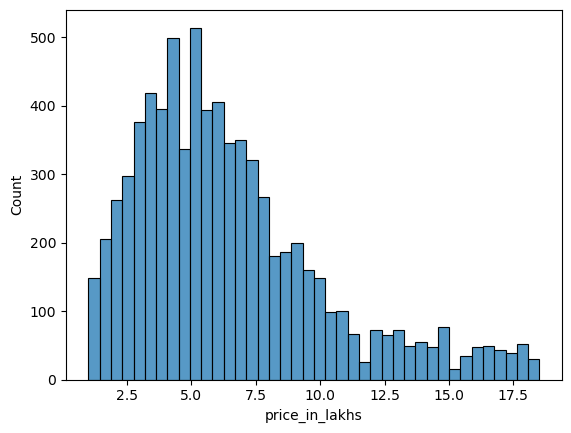

In [71]:
# Target variable
sns.histplot(filtered_df["price_in_lakhs"])
plt.show()

### ii) Box Plot

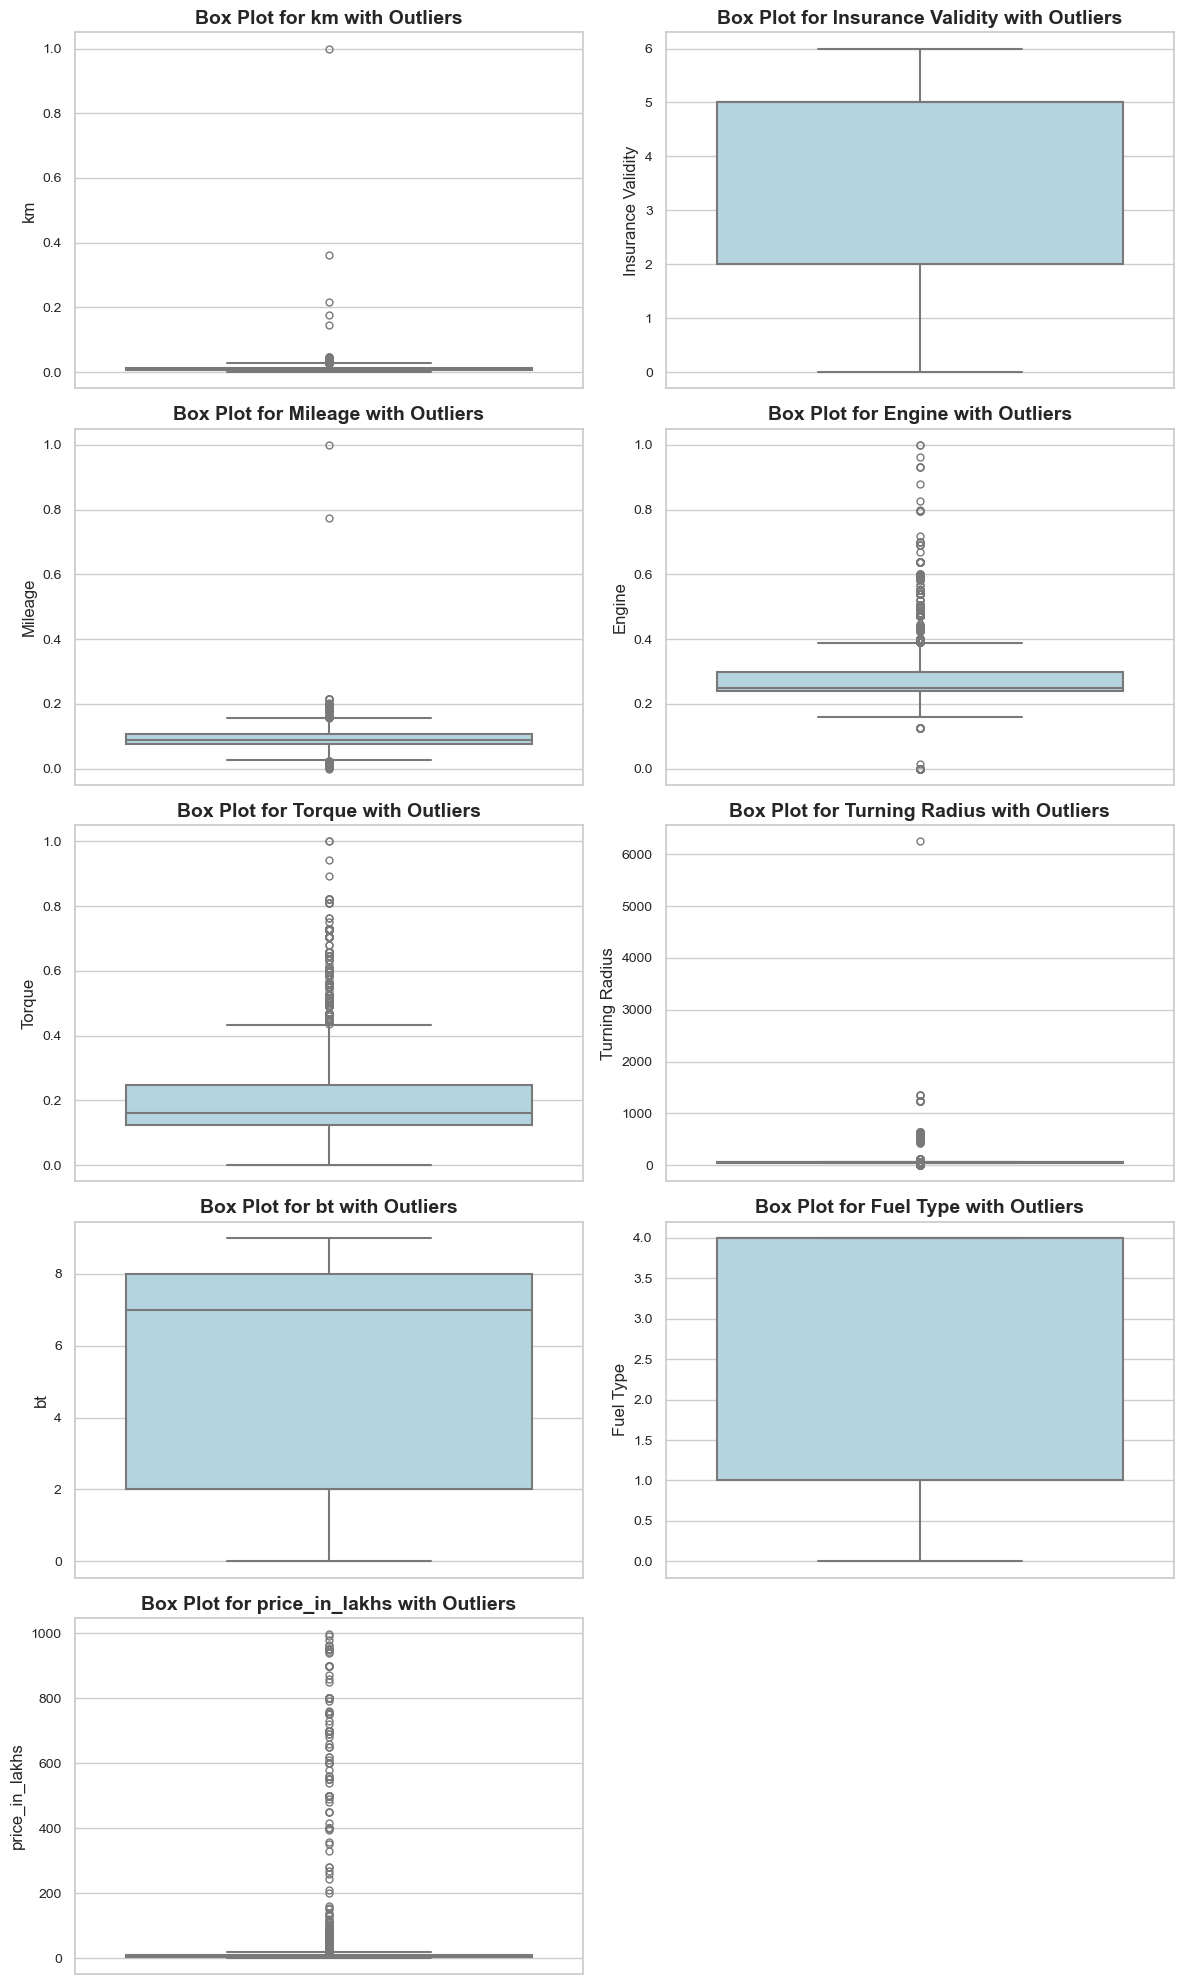

In [72]:
num_columns = len(col)
num_rows = (num_columns + 1) // 2
# Set a Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(12, num_rows * 4))

for i, column in enumerate(col, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(data=df, y=column, color="lightblue", fliersize=5, linewidth=1.5)
    plt.title(f'Box Plot for {column} with Outliers', fontsize=14, fontweight='bold')
    plt.ylabel(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### iii) Heat map

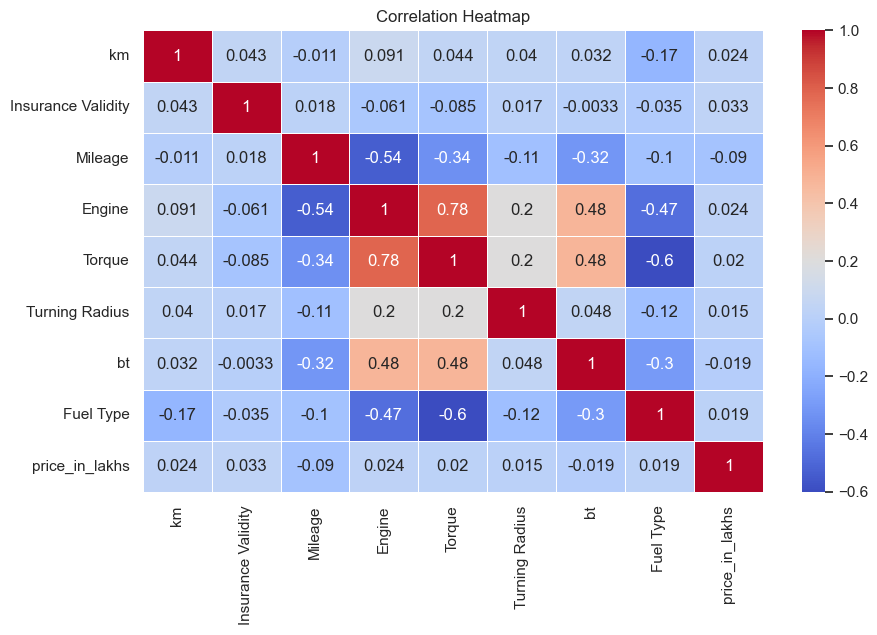

In [73]:
# Step 1: Select relevant columns for correlation
# We will focus on the specified columns: CustomerKey, ProductKey, StoreKey, and OrderNumber
correlation_data = df[col]

# Step 2: Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 3: Visualize the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### iv) Scatter plot

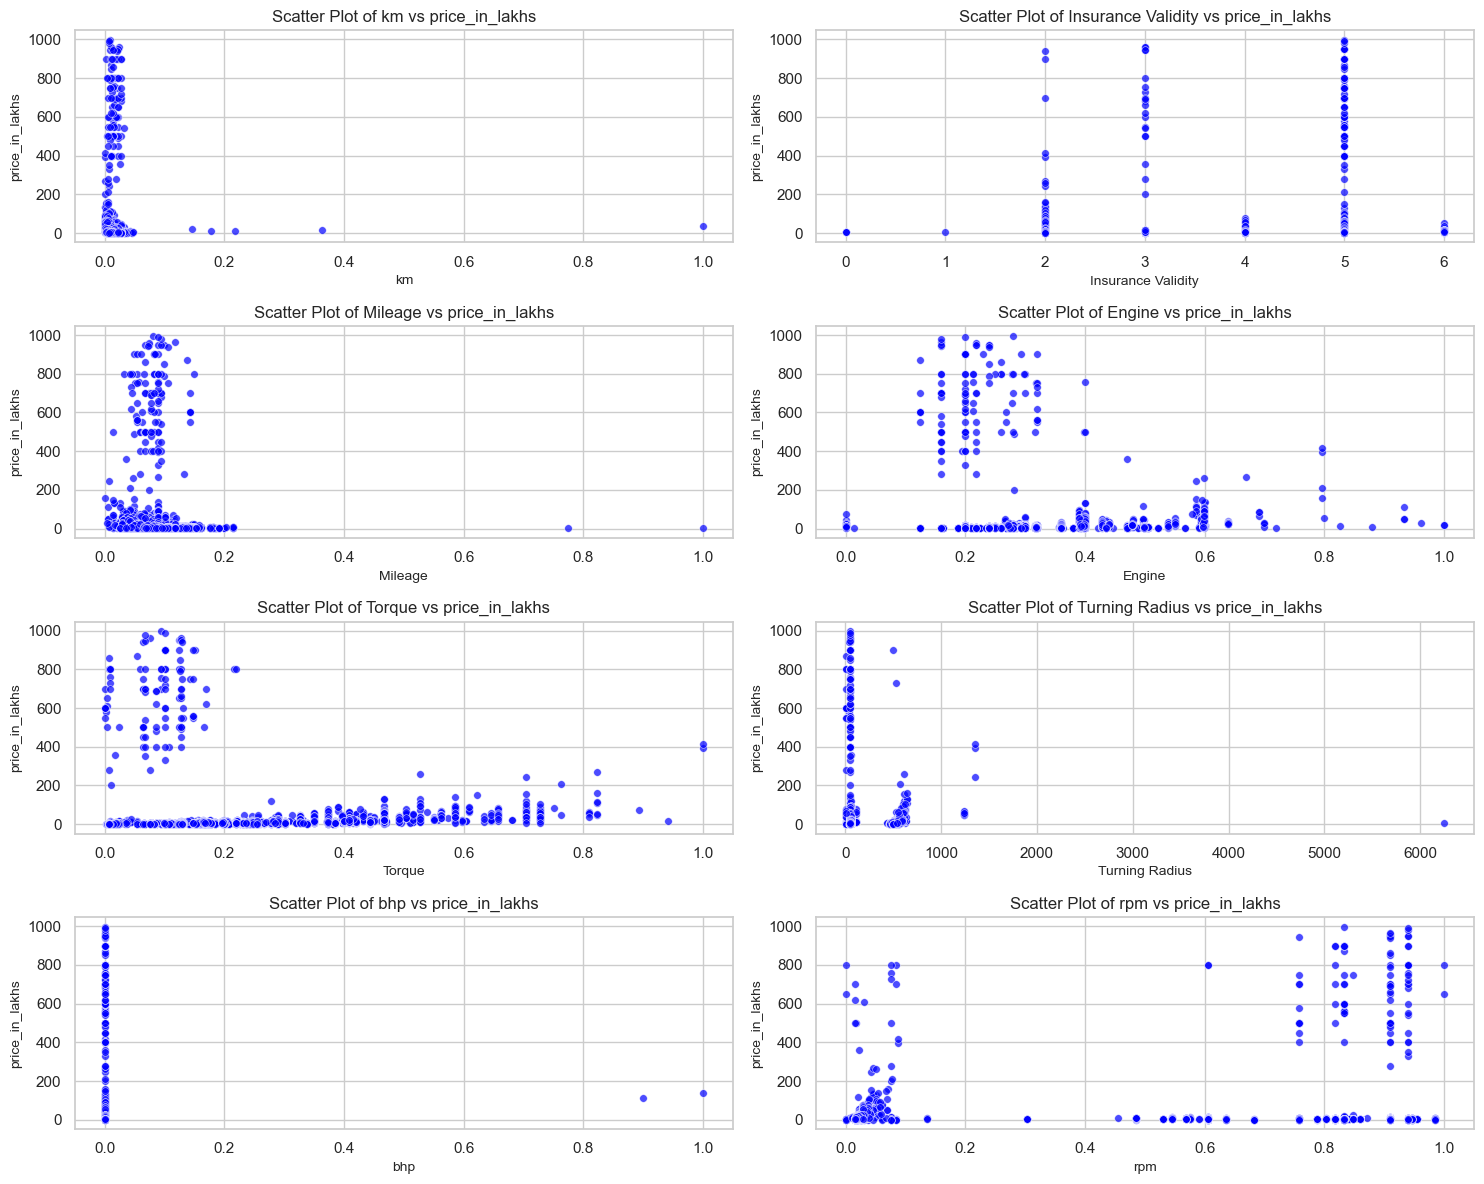

In [74]:
# Define the target variable and the columns you want to plot against it
target = "price_in_lakhs"  # Replace with your target column name
columns = ["km", "Insurance Validity", "Mileage", "Engine", "Torque", "Turning Radius", "bhp", "rpm"]

# Create subplots for each column
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns, start=1):
    plt.subplot(4, 2, i)  # Create a 4x2 grid of subplots
    sns.scatterplot(data=df, x=column, y=target, color="blue", s=30, alpha=0.7)
    plt.title(f'Scatter Plot of {column} vs {target}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel(target, fontsize=10)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [75]:
df=filtered_df

## d) Feature Selection

## i) Correlation Analysis

In [76]:
df.corr()

,bt,km,ownerNo,oem,model,Insurance Validity,Fuel Type,Transmission,Mileage,Engine,...,Turning Radius,Top Speed,No Door Numbers,Wheel Size,Alloy Wheel Size,City,bhp,rpm,Reg_age,price_in_lakhs
bt,1.000000,0.078408,-0.005283,-0.072914,-0.062441,0.036695,-0.267322,-0.162621,-0.294402,0.476052,...,-0.003644,0.278595,-0.594441,0.257180,0.257180,0.021208,0.027145,-0.638385,-0.041105,0.423625
km,0.078408,1.000000,0.192003,0.014699,0.030416,0.074073,-0.306030,0.086595,-0.044828,0.244472,...,0.045705,0.057393,-0.087727,-0.097129,-0.097129,-0.032622,0.038611,-0.100864,0.405888,-0.166464
ownerNo,-0.005283,0.192003,1.000000,-0.047213,-0.033311,0.117514,-0.075173,0.003959,-0.107362,0.138105,...,0.063713,0.020128,-0.075951,-0.123496,-0.123496,-0.072707,0.040490,-0.037159,0.378331,-0.201559
oem,-0.072914,0.014699,-0.047213,1.000000,0.988805,0.035139,-0.043493,0.018771,0.085251,-0.039759,...,0.105326,-0.097562,0.110740,0.040403,0.040403,-0.002316,-0.053516,0.028151,-0.110020,0.001632
model,-0.062441,0.030416,-0.033311,0.988805,1.000000,0.038520,-0.058424,0.017272,0.054524,-0.011430,...,0.130876,-0.074226,0.090743,0.024074,0.024074,-0.007694,-0.047794,0.007909,-0.082226,0.006603
Insurance Validity,0.036695,0.074073,0.117514,0.035139,0.038520,1.000000,-0.077779,0.049663,-0.018259,0.025557,...,0.050140,-0.007674,-0.029992,-0.060307,-0.060307,0.029401,0.023869,-0.036722,0.067102,-0.052303
Fuel Type,-0.267322,-0.306030,-0.075173,-0.043493,-0.058424,-0.077779,1.000000,-0.040238,-0.183194,-0.458517,...,-0.099809,-0.107452,0.028654,-0.150700,-0.150700,-0.035837,0.024869,0.334517,-0.132201,-0.199766
Transmission,-0.162621,0.086595,0.003959,0.018771,0.017272,0.049663,-0.040238,1.000000,0.158072,-0.157825,...,-0.036421,-0.228568,0.088311,-0.198494,-0.198494,0.077319,0.020921,0.244280,0.115087,-0.380497
Mileage,-0.294402,-0.044828,-0.107362,0.085251,0.054524,-0.018259,-0.183194,0.158072,1.000000,-0.492330,...,-0.071021,-0.221228,0.083357,-0.067796,-0.067796,0.013574,-0.048359,0.417033,-0.177193,-0.272111
Engine,0.476052,0.244472,0.138105,-0.039759,-0.011430,0.025557,-0.458517,-0.157825,-0.492330,1.000000,...,0.116949,0.360893,-0.219210,0.294543,0.294543,-0.015851,0.032801,-0.620191,0.212104,0.441425


## ii) Feature Selection using model

In [77]:
X = df.drop(columns=["price_in_lakhs"])
y = df["price_in_lakhs"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5959, 29), (1490, 29), (5959,), (1490,))

In [79]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
fi = pd.DataFrame({"Features":X_train.columns, "Importance":rf.feature_importances_})

In [81]:
f_df = fi.sort_values(by="Importance", ascending=False)[0:17]
f_df

,Features,Importance
17,Width,0.420334
28,Reg_age,0.209784
16,Length,0.080899
24,Alloy Wheel Size,0.052844
23,Wheel Size,0.044171
27,rpm,0.030340
1,km,0.025771
25,City,0.023034
10,Torque,0.017091
21,Top Speed,0.014057


In [82]:
X = df[f_df["Features"]]

In [83]:
X.to_csv("X.csv")

In [84]:
y

0       4.00
1       8.11
2       5.85
3       4.62
4       7.90
        ... 
8364    5.10
8365    1.80
8366    5.50
8367    1.40
8368    5.00
Name: price_in_lakhs, Length: 7449, dtype: float64

In [85]:
y.to_csv("y.csv")

In [86]:
feature_names = X.columns
feature_names

Index(['Width', 'Reg_age', 'Length', 'Alloy Wheel Size', 'Wheel Size', 'rpm',
       'km', 'City', 'Torque', 'Top Speed', 'Mileage', 'model', 'Height',
       'Engine and Transmission', 'Transmission', 'Displacement', 'Engine'],
      dtype='object')